# 學習率與梯度下降法，觀察損失函數的變化

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 使用MNIST資料集依照以下條件輸入網路，並畫出epoch與cross entropy的關係圖

### 建立5層的DNN網路

### 損失函數請使用cross entropy

### 優化器請選用Gradient Descent

### Batch size請設定200

### Epoch請設定50

### Learning rate請設定0.02

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch 0 cross_entropy: 633.3845703601837
Epoch 1 cross_entropy: 631.1019749641418
Epoch 2 cross_entropy: 622.6

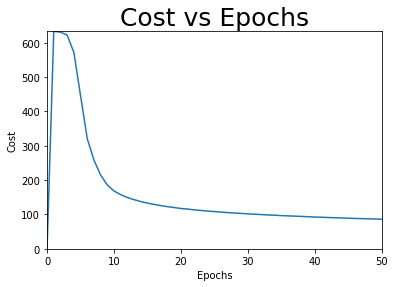

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

INPUT_NODE =784

LAYER1_NODE = 128
LAYER2_NODE = 64
LAYER3_NODE = 32
LAYER4_NODE = 16
LAYER5_NODE = 10


x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.truncated_normal([INPUT_NODE, LAYER1_NODE], stddev=0.1))
b1 = tf.Variable(tf.truncated_normal([LAYER1_NODE], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([LAYER1_NODE, LAYER2_NODE], stddev=0.1))
b2 = tf.Variable(tf.truncated_normal([LAYER2_NODE], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([LAYER2_NODE, LAYER3_NODE], stddev=0.1))
b3 = tf.Variable(tf.truncated_normal([LAYER3_NODE], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([LAYER3_NODE, LAYER4_NODE], stddev=0.1))
b4 = tf.Variable(tf.truncated_normal([LAYER4_NODE], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([LAYER4_NODE, LAYER5_NODE], stddev=0.1))
b5 = tf.Variable(tf.truncated_normal([LAYER5_NODE], stddev=0.1))

layer_1 = tf.matmul(x, W1) + b1
out1 = tf.nn.relu(layer_1)
layer_2 = tf.matmul(out1, W2) + b2
out2 = tf.nn.relu(layer_2)
layer_3 = tf.matmul(out2, W3) + b3
out3 = tf.nn.relu(layer_3)
layer_4 = tf.matmul(out3, W4) + b4
out4 = tf.nn.relu(layer_4)
layer_5 = tf.matmul(out4, W5) + b5
out5 = tf.nn.relu(layer_5)

y_predict = out5

learning_rate = 0.02

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_predict))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

batch_size = 200
epochs = 50

cost_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        epoch_loss = 0
        for _ in range(int(mnist.train.num_examples/batch_size)):
            epoch_x, epoch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cross_entropy], feed_dict={x: epoch_x, y: epoch_y})
            epoch_loss += c
        cost_history = np.append(cost_history,epoch_loss)
        print('Epoch', epoch,'cross_entropy:',epoch_loss)
        
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,epochs,0,np.max(cost_history)])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs', fontsize=25)
plt.show()